In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import argparse


In [45]:
#read images
negative = cv2.imread("margin_rodent.jpg")
positive = cv2.imread("tumor_human.jpg")

First display images

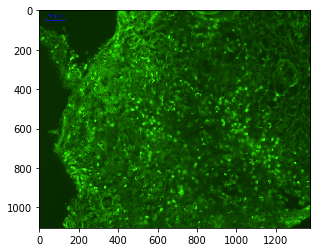

In [46]:
plt.imshow(positive)

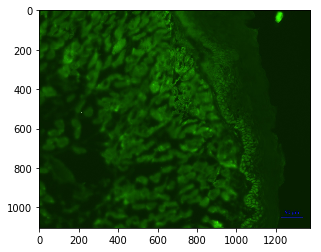

In [47]:
plt.imshow(negative)

Convert images to grayscale for manipulation

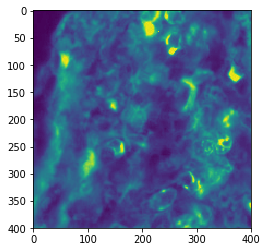

In [63]:
gray_pos = cv2.cvtColor(positive, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_pos[500:700,100:300].repeat(2,axis=1).repeat(2,axis=0))

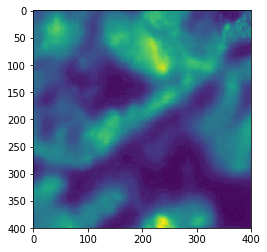

In [62]:
gray_neg = cv2.cvtColor(negative, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_neg[500:700,500:700].repeat(2,axis=1).repeat(2,axis=0))

# Image Thresholding as an initial trial

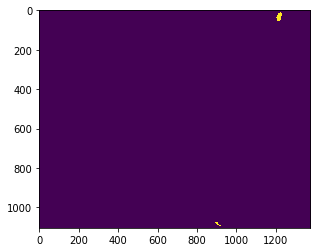

In [50]:
blurred_neg = cv2.bilateralFilter(gray_neg,9,75,75)
#blurred_neg = cv2.Laplacian(gray_neg,cv2.CV_64F)
thresh = cv2.threshold(blurred_neg, 120, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

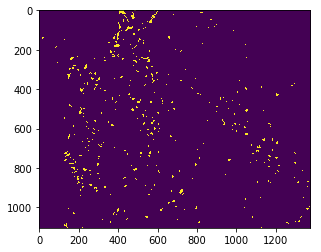

In [51]:
#blurred_pos = cv2.GaussianBlur(gray_pos, (5, 5), 0)
thresh = cv2.threshold(gray_pos, 120, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

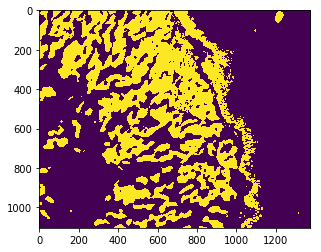

In [52]:
_, th2 = cv2.threshold(gray_neg,200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th2)

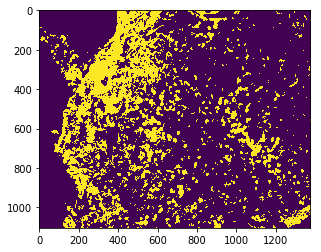

In [53]:
_, th3 = cv2.threshold(gray_pos,200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(th3)

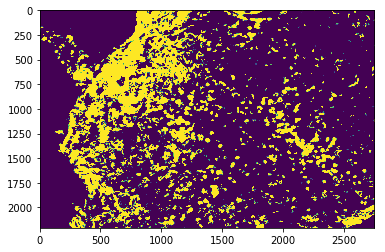

In [54]:
scale = 2
dim = (2* 1376, 2* 1104)
pos_large =cv2.resize(th3, dim )
neg_large =cv2.resize(th2, dim )

plt.imshow(pos_large, aspect = 'auto')

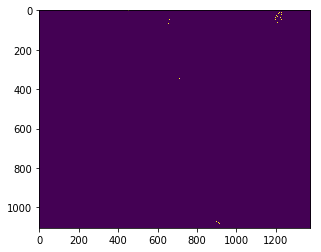

In [56]:
gray = cv2.bilateralFilter(gray_neg, 11, 17, 17)
edge_neg = cv2.Canny(gray, 30, 200)
plt.imshow(edge_neg)


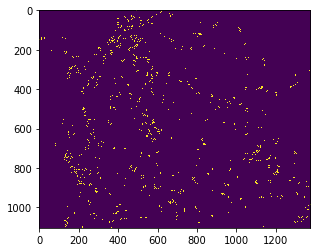

In [57]:
gray = cv2.bilateralFilter(gray_pos, 11, 17, 17)
edge_pos = cv2.Canny(gray, 30, 200)
plt.imshow(edge_pos)